# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

## Trabalho sobre testes de hipóteses

Utilizando os conhecimentos adquiridos em nosso treinamento realize o teste de hipóteses proposto abaixo.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais testes interessantes que podem ser realizados com o nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from scipy.stats import norm

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [28]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [29]:
df.head()

UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0  11     0     23    8              12    800  1.603808
1  11     1     23    2              12   1150  1.739790
2  11     1     35    8              15    880  1.760444
3  11     0     46    2               6   3500  1.783158
4  11     1     47    8               9    150  1.690631

## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

---

### Seleção das amostras

In [30]:
rj_renda = df.query('UF == 33 and Renda > 0').sample(n=500, random_state=101).Renda
rj_renda.head()

41616    1000
41070    1000
43285    1100
45337    2500
44918    1800
Name: Renda, dtype: int64

In [31]:
sp_renda = df.query('UF == 35 and Renda > 0').sample(n=500, random_state=101).Renda
sp_renda

52061    7500
48402    1400
50821    1500
54537    6000
46866    1500
         ... 
53940    2000
50362    1500
54412    2500
47834    1800
52972    1200
Name: Renda, Length: 500, dtype: int64

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [32]:
rj_media = rj_renda.mean()
rj_media

2742.13

In [33]:
rj_std = rj_renda.std()
rj_std

5000.574343075127

In [34]:
sp_media = sp_renda.mean()
sp_media

2515.54

In [35]:
sp_std = sp_renda.std()
sp_std

2928.824354685887

In [36]:
significancia = 0.05
confianca = 1 - significancia
n_sp = 500
n_rj = 500
D_0 = 0

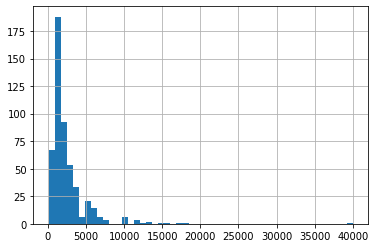

In [37]:
sp_renda.hist(bins=50)

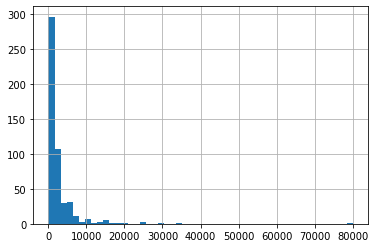

In [38]:
rj_renda.hist(bins=50)

## Lembre-se...

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do Rio de Janeiro
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios de São Paulo
### $
\begin{cases}
H_0: \mu_1 \geq \mu_2\\
H_1: \mu_1 < \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \geq 0\\
H_1: \mu_1 -\mu_2 < 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Não

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [39]:
probabilidade = confianca
probabilidade

0.95

In [46]:
# como é unicaudal para menor, usei significancia para dar o z_alpha negativo
z_alpha = norm.ppf(significancia)
z_alpha.round(2)

-1.64

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [44]:
numerador = (rj_media - sp_media) - D_0

denominador = np.sqrt((rj_std ** 2 / n_rj) + (sp_std ** 2 / n_sp))

z = numerador / denominador

z

0.8743012705687832

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha}$

In [47]:
z <= z_alpha

False

### <font color='red'>Critério do valor $p$</font>

### Utilize DescrStatsW

In [48]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [49]:
test_rj = DescrStatsW(rj_renda)

In [50]:
test_sp = DescrStatsW(sp_renda)

In [51]:
test_A = test_rj.get_compare(test_sp)

z, p_valor = test_A.ztest_ind(alternative='smaller', value=0)
print(z)
print(p_valor)

0.8743012705687832
0.8090228962065804


### Utilize CompareMeans

In [52]:
test_B = CompareMeans(test_rj, test_sp)

In [53]:
z, p_valor = test_B.ztest_ind(alternative='smaller', value=0)
print(z)
print(p_valor)

0.8743012705687832
0.8090228962065804


In [54]:
p_valor <= significancia

False

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do Rio de Janeiro não é menor que a média das rendas dos chefes de domicílios de São Paulo. Confirmando a alegação de igualdade de renda entre os dois estados.</font>